## Pokemon Legendary Predictor

### Por: @MSLacerda

## Descrição

Este é um exemplo simples de uma rede neural construída com keras(backend: Tensorflow), criaremos uma rede neural do tipo feedfoward supervisionada que ao final do treinamento nos fornece um modelo que é capaz de dizer, de acordo com os atritbutos, se um pokemon é lendário ou não. 

## Dependencias e Dataset

Fazemos a importação do nosso dataset e bibliotecas necessarias para a construção da rede-neural.

### Camada Densa

Camada densa é basicamente uma camada densamente conectade, ou seja cada neurônio irá receber em sua entrada os dados de todos os neurônios da camada anterior.

**A camada vai processar:**
        `saida = activation(dot(input, kernel) + bias)`


In [177]:
# Usaremos um modelo do tipo sequencial de camadas
from keras.models import Sequential
# Callback para depurar nosso treinamento
from keras.callbacks import ModelCheckpoint
# Importamos os tipos de camadas que iremos utilizar no nossa rede neural
# Veja a explicação na notação acima
from keras.layers.core import Dense, Dropout
# Importamos Stochastic Gradient Descent para configurar a fução de otimização de nossa rede
from keras.optimizers import SGD
# Importaremos o pyplot para plotar os gráficos do histórico de treinamento
import matplotlib.pyplot as plt
# Pandas para carregar e armazenar o dataset usado par o treinamento
import pandas as pd


# Data: Variável que contem o dataset original
# Importação do csv que contém os dados
data = pd.read_csv('./dataset/pokemon.csv')

## Normalizando os dados

Agora, iremos normalizar o nosso dataset para que o mesmo possa servir de entrada para a rede neural.

<ul> 
    <li> Removemos os atributos que não fornecem dados relevantes par o treinamento </li>
    <li> Removemos os atributos do tipo texto, nesse exemplo 
        simples não iremos transformar os dados em textos </li>
    <li> Criamos um dataset apenas com os valores referente ao treinamento, ou seja se é lendário
        ou não </li>
    <li> Substituímos os valores nulos por zero </li>
</ul>
    

In [178]:
X = data.drop(['abilities', 'classfication', 'type1', 'type2', 'name','percentage_male','generation', 'japanese_name', 'is_legendary', 'capture_rate'], axis=1)

normalized_Y = data[['is_legendary']]
normalized_X=(X-X.min())/(X.max()-X.min())
normalized_X = normalized_X.fillna(0)

## Dividindo os dados

Iremos dividir os dataset de treinamento e validação, em respectivamente, 75% e 25% dos dados totais. O mesmo é feito para os dados de referencia (dados de supervisão).

In [175]:
# 75% dos dados para treinamento
train_size = int(len(normalized_X) * .75)

X_train, X_test = normalized_X[0:train_size], normalized_X[train_size:len(normalized_X)]
Y_train, Y_test = normalized_Y[0:train_size], normalized_Y[train_size:len(normalized_Y)]

## Treinando o Modelo

Nossa rede é sequencial, ou seja uma rede neural *feed-foward*, as camadas são "empilhadas" e os dados seguem uma única direção.

### Input_dim: **O formato da entrada de treinamento**

A topologia de nossa rede tem esse formato:

` Camada(Entrada(16 neurônios), Função de ativação="relu") ->  Camada(16 neurônios, Função de ativação="relu") -> Camada(Saída, Função de ativação="sigmoid")`

A rede tem como saída um valor entre 0 e 1, já que o o resultado pode variar apenas entre esses dois valores, é binário.

<b>É</b> ou <b>não é</b> lendário

## SGD

**SGD** é Stochastic Gradient Descent é a função de otimização que utilizaremos para 


In [176]:
input_dim = X_train.shape[1]

model = Sequential()
model.add(Dense(16, input_shape=(input_dim,), activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

opt = SGD(lr=0.01)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=["accuracy"])
checkpoint = ModelCheckpoint('./temp_checkpoint', monitor='val_acc', verbose=0, save_best_only=False, mode='max')
history = model.fit(X_train, Y_train, epochs=500, validation_split=0.25, batch_size=10, verbose=1, callbacks=[checkpoint])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 16)                512       
_________________________________________________________________
dropout_11 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_63 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_12 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 17        
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________
Train on 401 samples, validate on 199 samples
Epoch 1/500
401/401 [==============================] - 2s 6ms/step - loss: 0.7792 - acc: 0.5187 - 

Epoch 54/500
401/401 [==============================] - 0s 583us/step - loss: 0.1714 - acc: 0.9526 - val_loss: 0.1852 - val_acc: 0.9296
Epoch 55/500
401/401 [==============================] - 0s 417us/step - loss: 0.1618 - acc: 0.9551 - val_loss: 0.1842 - val_acc: 0.9296
Epoch 56/500
401/401 [==============================] - 0s 414us/step - loss: 0.1665 - acc: 0.9551 - val_loss: 0.1834 - val_acc: 0.9296
Epoch 57/500
401/401 [==============================] - 0s 432us/step - loss: 0.1503 - acc: 0.9576 - val_loss: 0.1838 - val_acc: 0.9296
Epoch 58/500
401/401 [==============================] - 0s 417us/step - loss: 0.1685 - acc: 0.9551 - val_loss: 0.1846 - val_acc: 0.9296
Epoch 59/500
401/401 [==============================] - 0s 439us/step - loss: 0.1762 - acc: 0.9476 - val_loss: 0.1812 - val_acc: 0.9296
Epoch 60/500
401/401 [==============================] - 0s 441us/step - loss: 0.1360 - acc: 0.9601 - val_loss: 0.1786 - val_acc: 0.9296
Epoch 61/500
401/401 [==========================

401/401 [==============================] - 0s 340us/step - loss: 0.1315 - acc: 0.9626 - val_loss: 0.1284 - val_acc: 0.9447
Epoch 115/500
401/401 [==============================] - 0s 357us/step - loss: 0.1050 - acc: 0.9776 - val_loss: 0.1266 - val_acc: 0.9497
Epoch 116/500
401/401 [==============================] - 0s 802us/step - loss: 0.1344 - acc: 0.9651 - val_loss: 0.1249 - val_acc: 0.9497
Epoch 117/500
401/401 [==============================] - 0s 368us/step - loss: 0.1169 - acc: 0.9626 - val_loss: 0.1223 - val_acc: 0.9497
Epoch 118/500
401/401 [==============================] - 0s 342us/step - loss: 0.1193 - acc: 0.9651 - val_loss: 0.1220 - val_acc: 0.9497
Epoch 119/500
401/401 [==============================] - 0s 373us/step - loss: 0.1037 - acc: 0.9701 - val_loss: 0.1220 - val_acc: 0.9548
Epoch 120/500
401/401 [==============================] - 0s 363us/step - loss: 0.0942 - acc: 0.9626 - val_loss: 0.1244 - val_acc: 0.9497
Epoch 121/500
401/401 [==============================] 

Epoch 174/500
401/401 [==============================] - 0s 357us/step - loss: 0.0757 - acc: 0.9776 - val_loss: 0.0988 - val_acc: 0.9749
Epoch 175/500
401/401 [==============================] - 0s 397us/step - loss: 0.0742 - acc: 0.9776 - val_loss: 0.0987 - val_acc: 0.9749
Epoch 176/500
401/401 [==============================] - 0s 322us/step - loss: 0.0816 - acc: 0.9751 - val_loss: 0.1005 - val_acc: 0.9749
Epoch 177/500
401/401 [==============================] - 0s 356us/step - loss: 0.0733 - acc: 0.9776 - val_loss: 0.0969 - val_acc: 0.9749
Epoch 178/500
401/401 [==============================] - 0s 353us/step - loss: 0.0714 - acc: 0.9800 - val_loss: 0.0959 - val_acc: 0.9749
Epoch 179/500
401/401 [==============================] - 0s 343us/step - loss: 0.1135 - acc: 0.9676 - val_loss: 0.0914 - val_acc: 0.9749
Epoch 180/500
401/401 [==============================] - 0s 334us/step - loss: 0.0727 - acc: 0.9800 - val_loss: 0.0938 - val_acc: 0.9749
Epoch 181/500
401/401 [==================

Epoch 234/500
401/401 [==============================] - 0s 365us/step - loss: 0.0529 - acc: 0.9776 - val_loss: 0.0876 - val_acc: 0.9749
Epoch 235/500
401/401 [==============================] - 0s 337us/step - loss: 0.0404 - acc: 0.9900 - val_loss: 0.0852 - val_acc: 0.9749
Epoch 236/500
401/401 [==============================] - 0s 271us/step - loss: 0.0466 - acc: 0.9776 - val_loss: 0.0832 - val_acc: 0.9749
Epoch 237/500
401/401 [==============================] - 0s 357us/step - loss: 0.0494 - acc: 0.9850 - val_loss: 0.0837 - val_acc: 0.9749
Epoch 238/500
401/401 [==============================] - 0s 368us/step - loss: 0.0578 - acc: 0.9825 - val_loss: 0.0819 - val_acc: 0.9749
Epoch 239/500
401/401 [==============================] - 0s 337us/step - loss: 0.0613 - acc: 0.9825 - val_loss: 0.0830 - val_acc: 0.9749
Epoch 240/500
401/401 [==============================] - 0s 364us/step - loss: 0.0431 - acc: 0.9925 - val_loss: 0.0851 - val_acc: 0.9749
Epoch 241/500
401/401 [==================

Epoch 294/500
401/401 [==============================] - 0s 327us/step - loss: 0.0256 - acc: 0.9950 - val_loss: 0.0906 - val_acc: 0.9749
Epoch 295/500
401/401 [==============================] - 0s 368us/step - loss: 0.0387 - acc: 0.9900 - val_loss: 0.0885 - val_acc: 0.9749
Epoch 296/500
401/401 [==============================] - 0s 396us/step - loss: 0.0378 - acc: 0.9875 - val_loss: 0.0873 - val_acc: 0.9749
Epoch 297/500
401/401 [==============================] - 0s 384us/step - loss: 0.0621 - acc: 0.9825 - val_loss: 0.0911 - val_acc: 0.9749
Epoch 298/500
401/401 [==============================] - 0s 359us/step - loss: 0.0348 - acc: 0.9875 - val_loss: 0.0907 - val_acc: 0.9749
Epoch 299/500
401/401 [==============================] - 0s 343us/step - loss: 0.0334 - acc: 0.9950 - val_loss: 0.0928 - val_acc: 0.9749
Epoch 300/500
401/401 [==============================] - 0s 384us/step - loss: 0.0375 - acc: 0.9850 - val_loss: 0.0920 - val_acc: 0.9749
Epoch 301/500
401/401 [==================

Epoch 354/500
401/401 [==============================] - 0s 389us/step - loss: 0.0245 - acc: 0.9925 - val_loss: 0.0936 - val_acc: 0.9799
Epoch 355/500
401/401 [==============================] - 0s 331us/step - loss: 0.0321 - acc: 0.9900 - val_loss: 0.0947 - val_acc: 0.9799
Epoch 356/500
401/401 [==============================] - 0s 384us/step - loss: 0.0321 - acc: 0.9875 - val_loss: 0.0950 - val_acc: 0.9799
Epoch 357/500
401/401 [==============================] - 0s 378us/step - loss: 0.0331 - acc: 0.9900 - val_loss: 0.0963 - val_acc: 0.9749
Epoch 358/500
401/401 [==============================] - 0s 433us/step - loss: 0.0470 - acc: 0.9875 - val_loss: 0.0964 - val_acc: 0.9749
Epoch 359/500
401/401 [==============================] - 0s 317us/step - loss: 0.0326 - acc: 0.9925 - val_loss: 0.0939 - val_acc: 0.9799
Epoch 360/500
401/401 [==============================] - 0s 360us/step - loss: 0.0377 - acc: 0.9925 - val_loss: 0.0958 - val_acc: 0.9799
Epoch 361/500
401/401 [==================

Epoch 414/500
401/401 [==============================] - 0s 371us/step - loss: 0.0200 - acc: 0.9950 - val_loss: 0.0934 - val_acc: 0.9799
Epoch 415/500
401/401 [==============================] - 0s 422us/step - loss: 0.0382 - acc: 0.9925 - val_loss: 0.0955 - val_acc: 0.9799
Epoch 416/500
401/401 [==============================] - 0s 366us/step - loss: 0.0387 - acc: 0.9925 - val_loss: 0.0961 - val_acc: 0.9799
Epoch 417/500
401/401 [==============================] - 0s 356us/step - loss: 0.0280 - acc: 0.9925 - val_loss: 0.0958 - val_acc: 0.9799
Epoch 418/500
401/401 [==============================] - 0s 314us/step - loss: 0.0398 - acc: 0.9875 - val_loss: 0.0930 - val_acc: 0.9799
Epoch 419/500
401/401 [==============================] - 0s 358us/step - loss: 0.0526 - acc: 0.9900 - val_loss: 0.0937 - val_acc: 0.9799
Epoch 420/500
401/401 [==============================] - 0s 612us/step - loss: 0.0470 - acc: 0.9875 - val_loss: 0.0975 - val_acc: 0.9799
Epoch 421/500
401/401 [==================

Epoch 474/500
401/401 [==============================] - 0s 353us/step - loss: 0.0342 - acc: 0.9925 - val_loss: 0.1001 - val_acc: 0.9799
Epoch 475/500
401/401 [==============================] - 0s 365us/step - loss: 0.0327 - acc: 0.9925 - val_loss: 0.1009 - val_acc: 0.9799
Epoch 476/500
401/401 [==============================] - 0s 369us/step - loss: 0.0243 - acc: 0.9925 - val_loss: 0.1015 - val_acc: 0.9799
Epoch 477/500
401/401 [==============================] - 0s 322us/step - loss: 0.0178 - acc: 0.9925 - val_loss: 0.1011 - val_acc: 0.9799
Epoch 478/500
401/401 [==============================] - 0s 380us/step - loss: 0.0228 - acc: 0.9950 - val_loss: 0.1020 - val_acc: 0.9799
Epoch 479/500
401/401 [==============================] - 0s 360us/step - loss: 0.0466 - acc: 0.9850 - val_loss: 0.1010 - val_acc: 0.9799
Epoch 480/500
401/401 [==============================] - 0s 325us/step - loss: 0.0270 - acc: 0.9925 - val_loss: 0.0980 - val_acc: 0.9799
Epoch 481/500
401/401 [==================

# Visualização dos dados de treinemanto

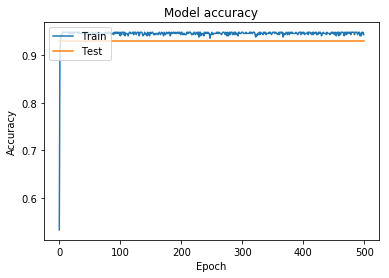

In [168]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

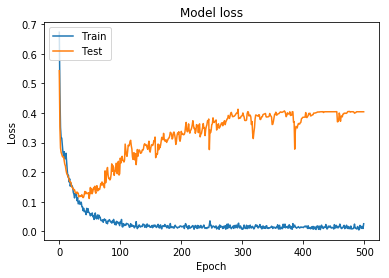

In [169]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [170]:
predictions = model.predict(X_test)
predictions_rounded = [(round(x[0], 2) * 100) for x in predictions]

data_test = data[train_size:len(data)]
pos = 180

df = pd.DataFrame(columns=['name', 'is_legendary', 'prediction'])

for i in range(201):
    df = df.append({'name':data_test.iloc[i].loc['name'], 'is_legendary': ("Sim" if data_test.iloc[i].is_legendary else "Não"), 'prediction': predictions_rounded[i] }, ignore_index=True)
df

,name,is_legendary,prediction
0,Klinklang,Não,0.000000
1,Tynamo,Não,0.000000
2,Eelektrik,Não,0.000000
3,Eelektross,Não,0.000000
4,Elgyem,Não,0.000000
5,Beheeyem,Não,0.000000
6,Litwick,Não,0.000000
7,Lampent,Não,0.000000
8,Chandelure,Não,0.000000
9,Axew,Não,0.000000


In [152]:
data_test.iloc[36]

abilities            ['Flame Body', 'Swarm']
against_bug                              0.5
against_dark                               1
against_dragon                             1
against_electric                           1
against_fairy                            0.5
against_fight                            0.5
against_fire                               1
against_flying                             2
against_ghost                              1
against_grass                           0.25
against_ground                             1
against_ice                              0.5
against_normal                             1
against_poison                             1
against_psychic                            1
against_rock                               4
against_steel                            0.5
against_water                              2
attack                                    60
base_egg_steps                         10240
base_happiness                            70
base_total